In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

In [2]:
df = pd.read_csv('cardio_train.csv',sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


*       All features are numerical
*       integers and 1 decimal number (weight)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [6]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

convert age to years for better understanding 

In [7]:
df["age_years"] = (df["age"] / 365).astype(int)

Create BMI Feature

In [8]:
df["BMI"] = df["weight"] / (df["height"]/100)**2

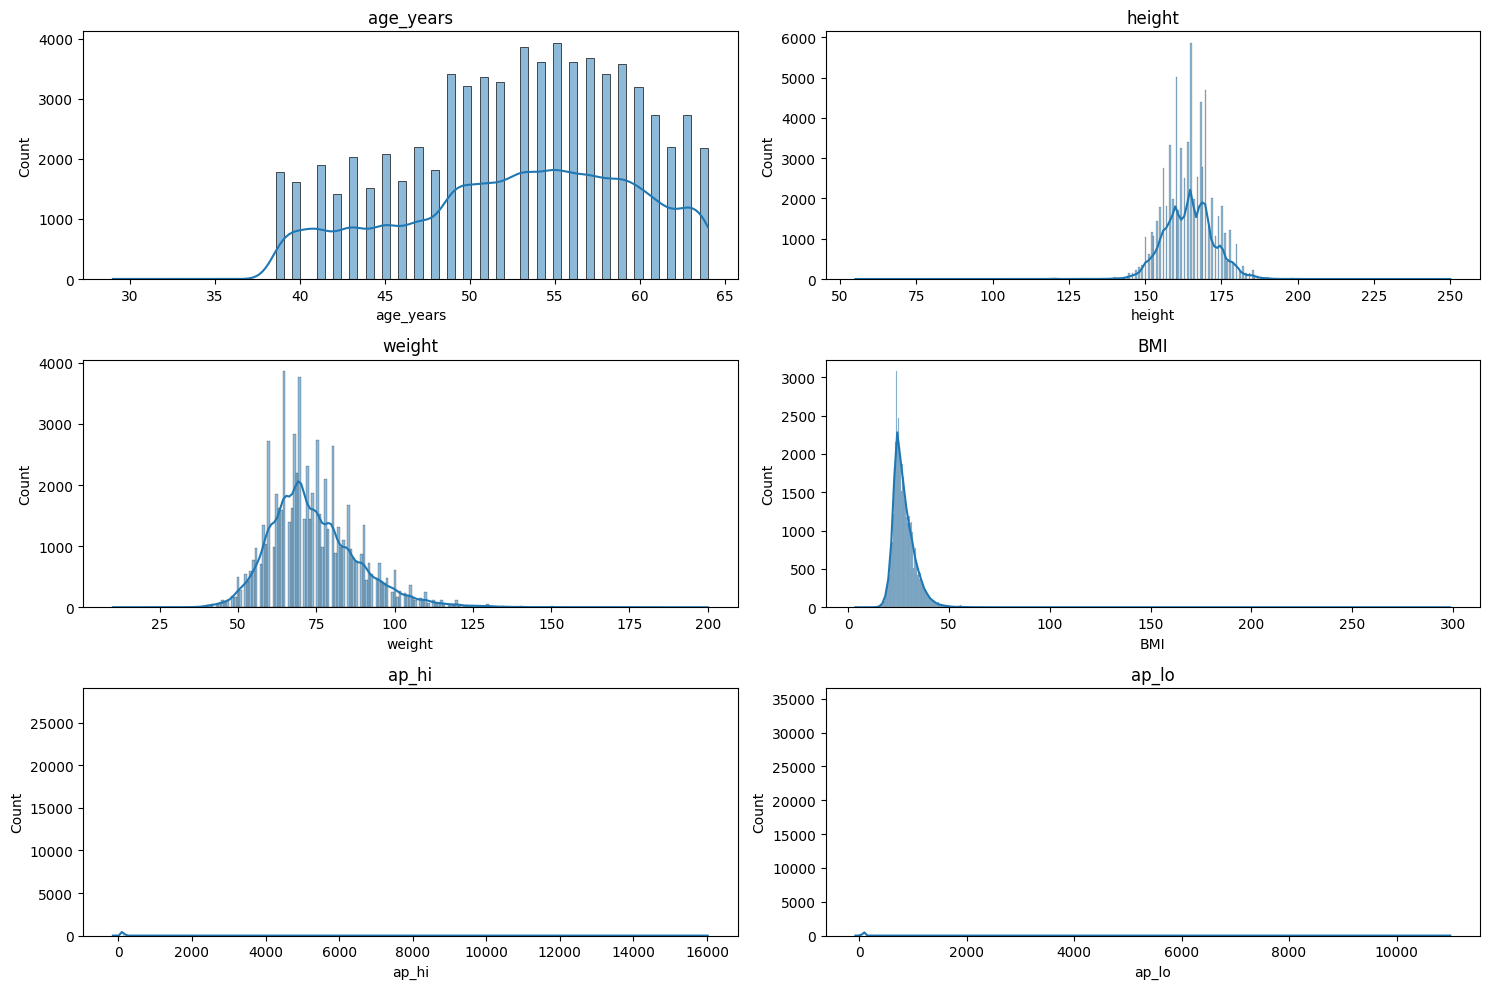

In [9]:
num_cols = ["age_years", "height", "weight", "BMI", "ap_hi", "ap_lo"]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


## obsevations
1. Age
*   roughly uniform
*   No obvious outliers
2. Height
*   close to normal 
*   Few outliers
3. Weight
*   Right-skewed distribution
*  Long tail reaching up to 200 kg
(not nessecarily outliers)
5. ap_hi (Systolic Blood Pressure)

* Many unrealistic data points  

6. ap_lo (Diastolic Blood Pressure)
* Many unrealistic data points

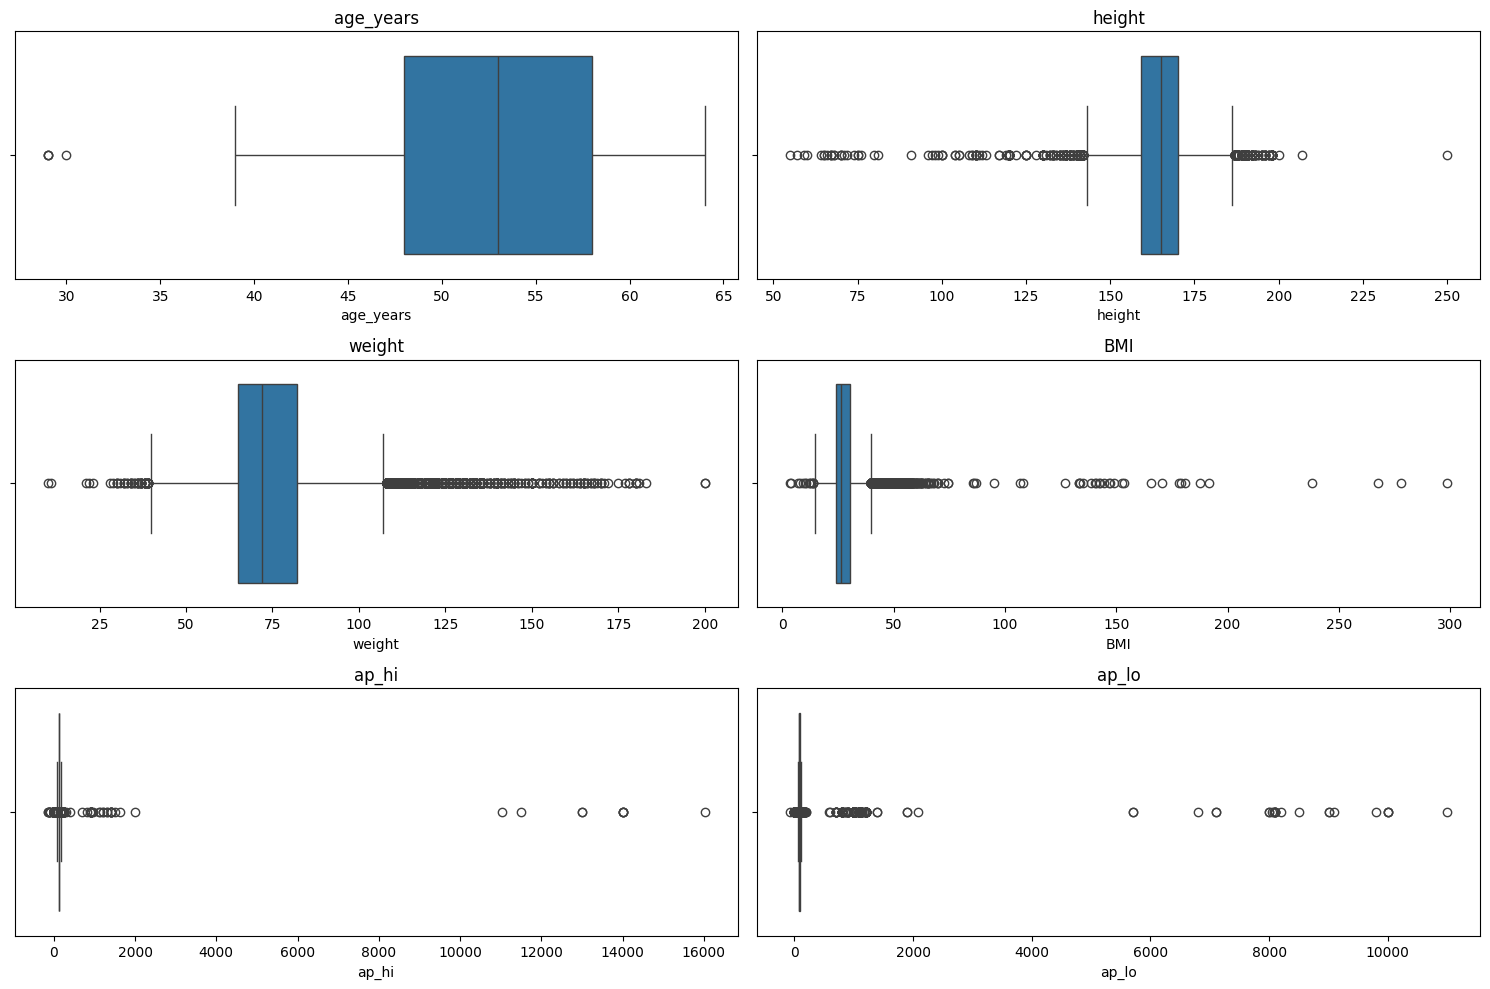

In [10]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


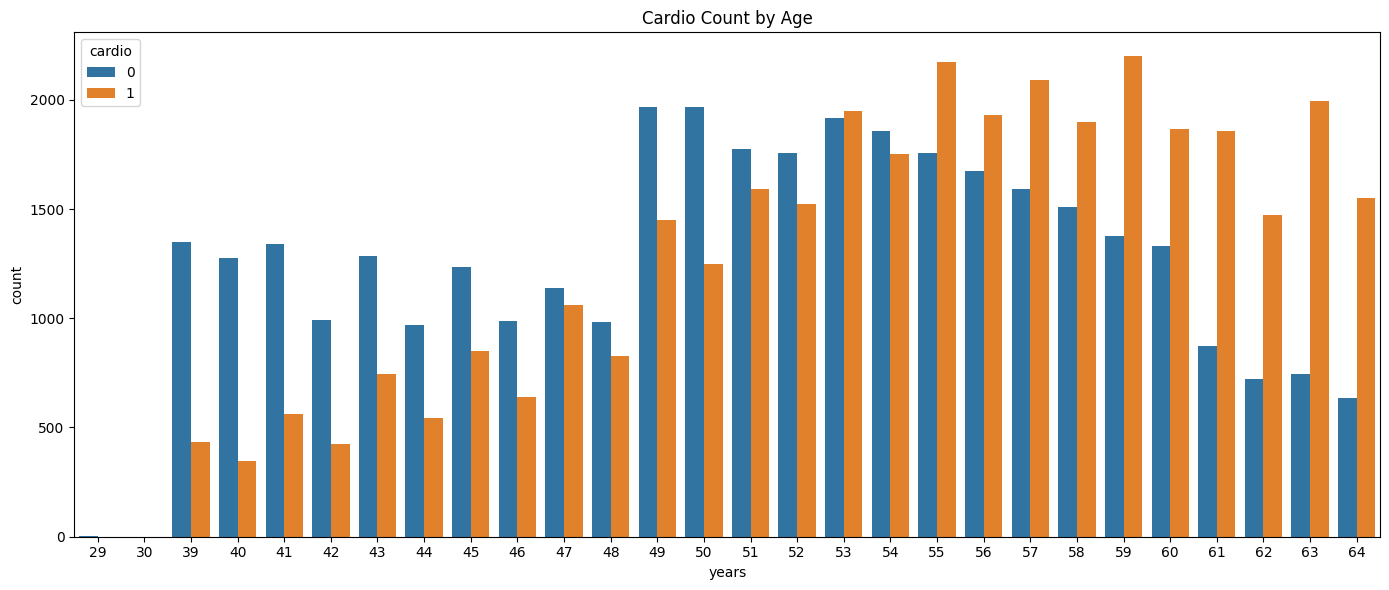

In [11]:

plt.figure(figsize=(14,6))
sns.countplot(data=df, x="age_years", hue="cardio")

plt.xlabel("years")
plt.ylabel("count")
plt.title("Cardio Count by Age")
plt.xticks()
plt.tight_layout()
plt.show()


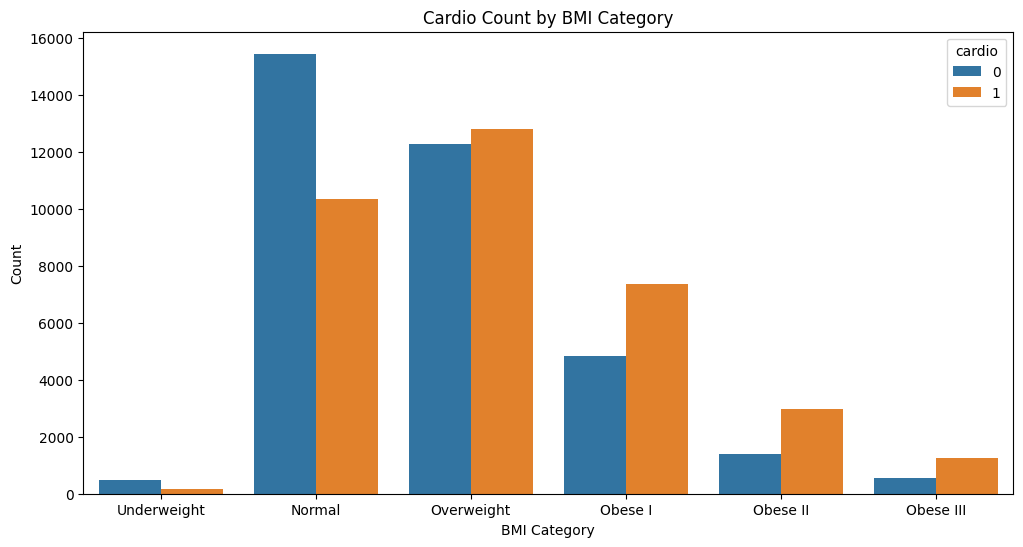

In [12]:
df['bmi_bin'] = pd.cut(df['BMI'], bins=[10, 18.5, 25, 30, 35, 40, 60],
                       labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='bmi_bin', hue='cardio')
plt.title("Cardio Count by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()


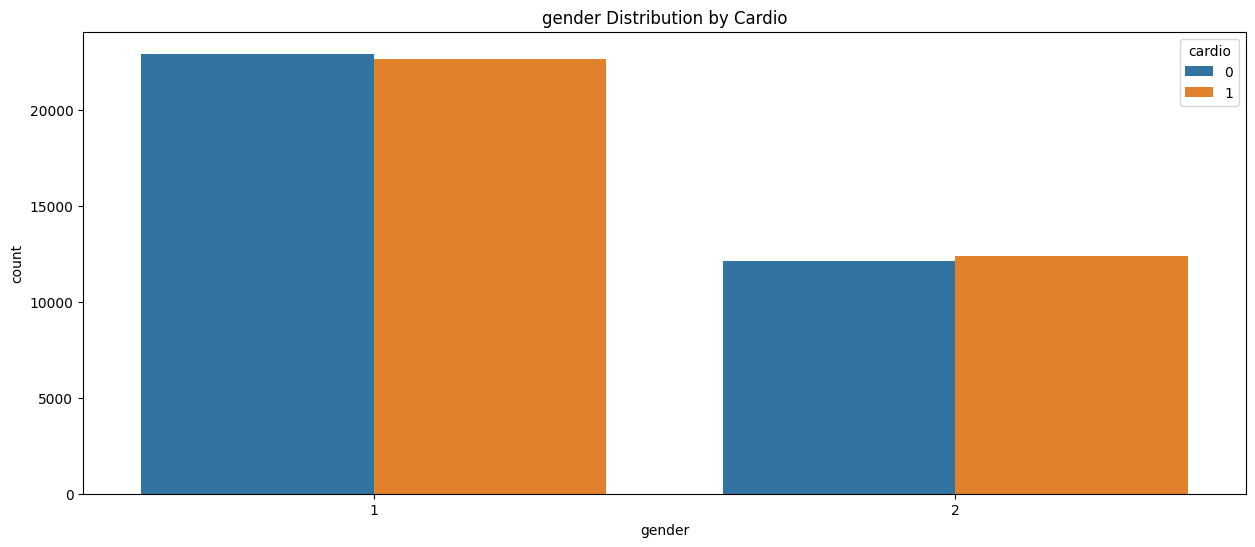

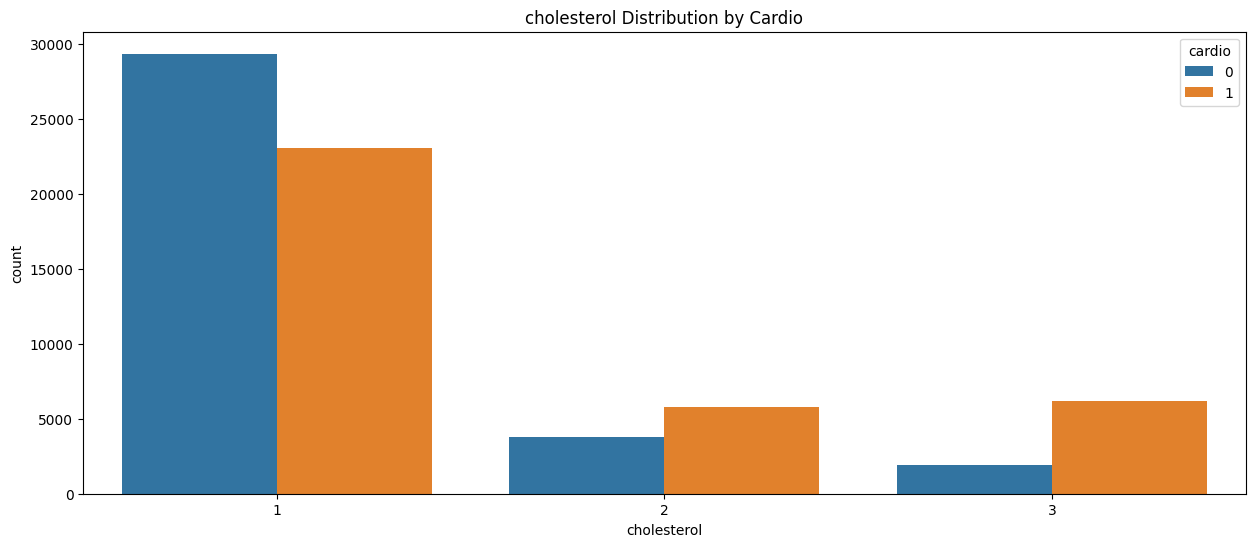

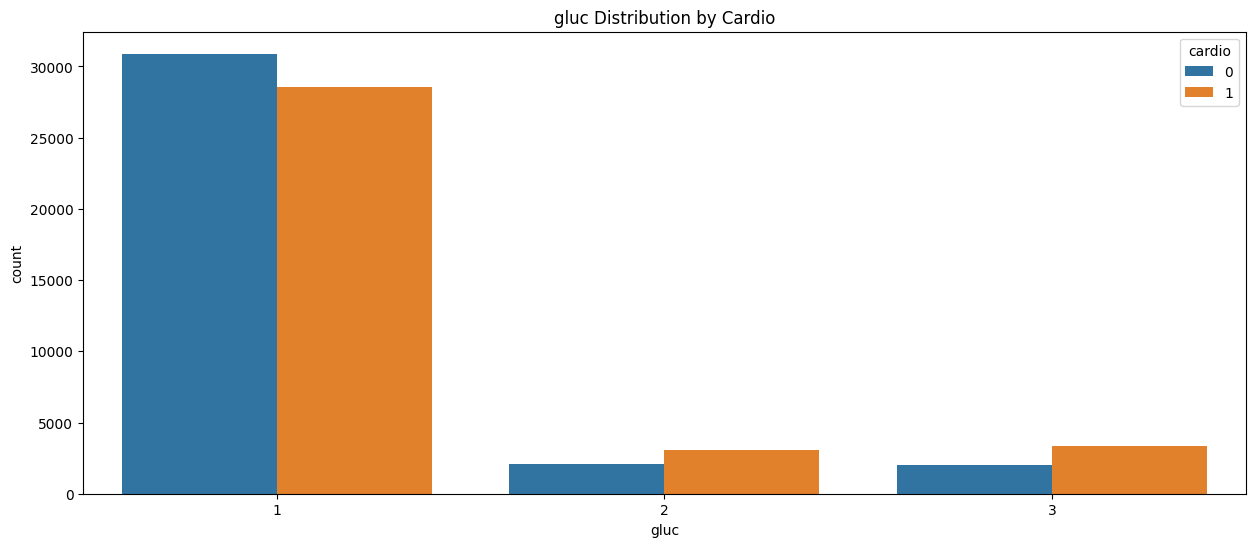

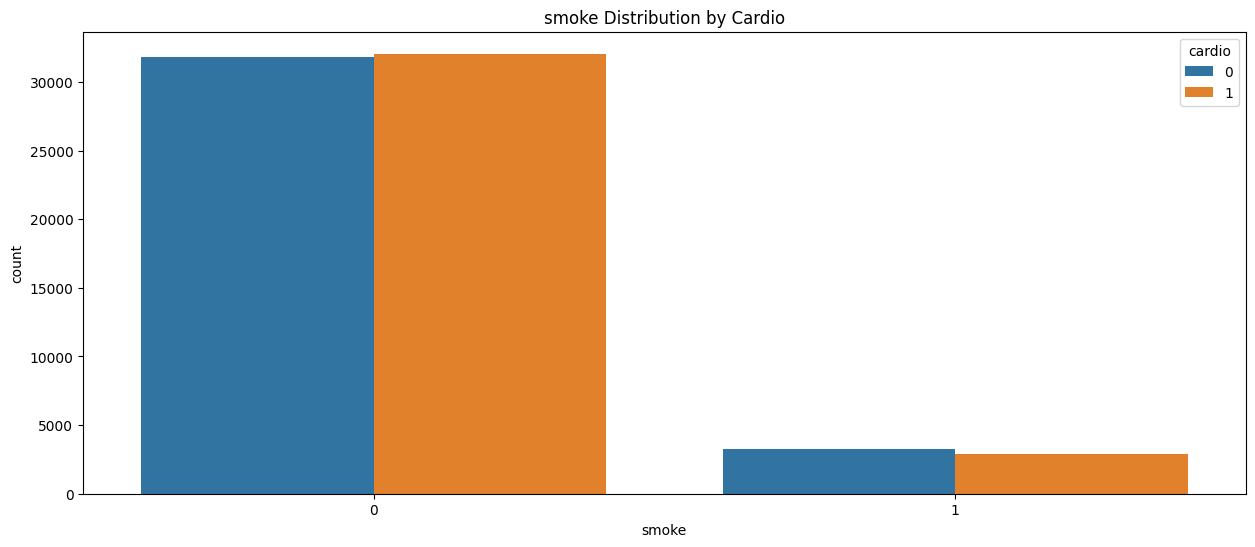

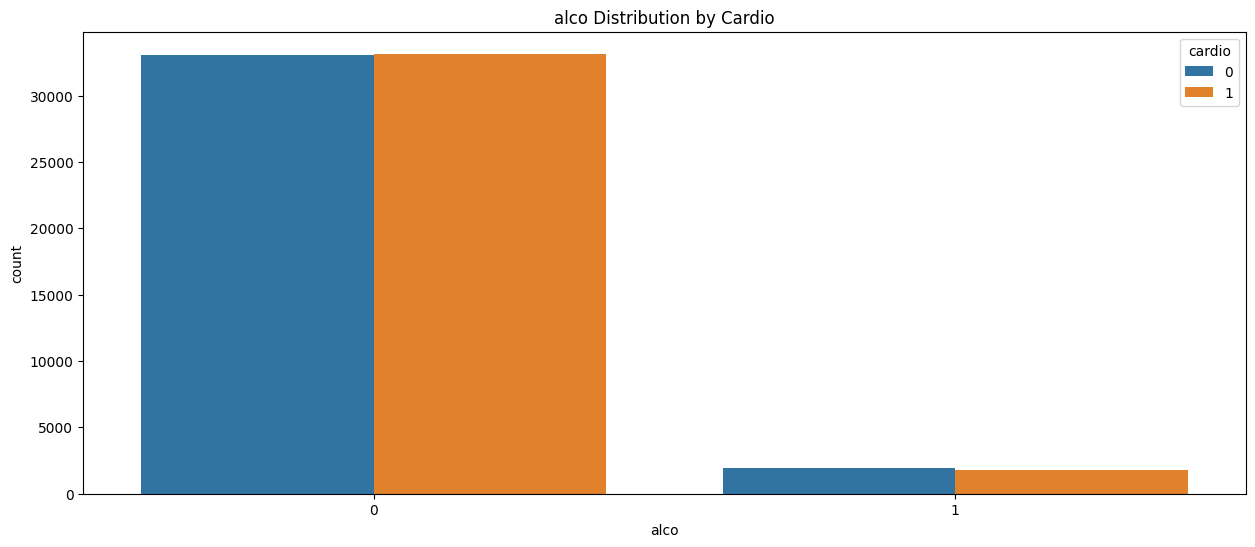

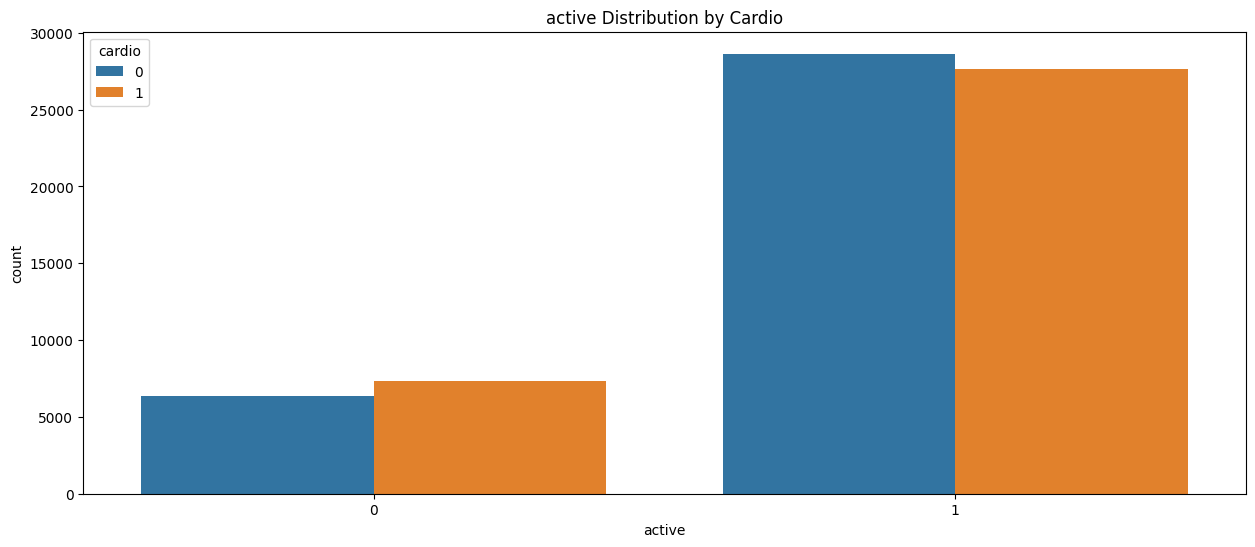

In [13]:
cat_cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
for col in cat_cols:
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=col, hue='cardio')
    plt.title(f"{col} Distribution by Cardio")
    plt.show()


## Correlation analysis between all 12 clinical features and cardiovascular disease


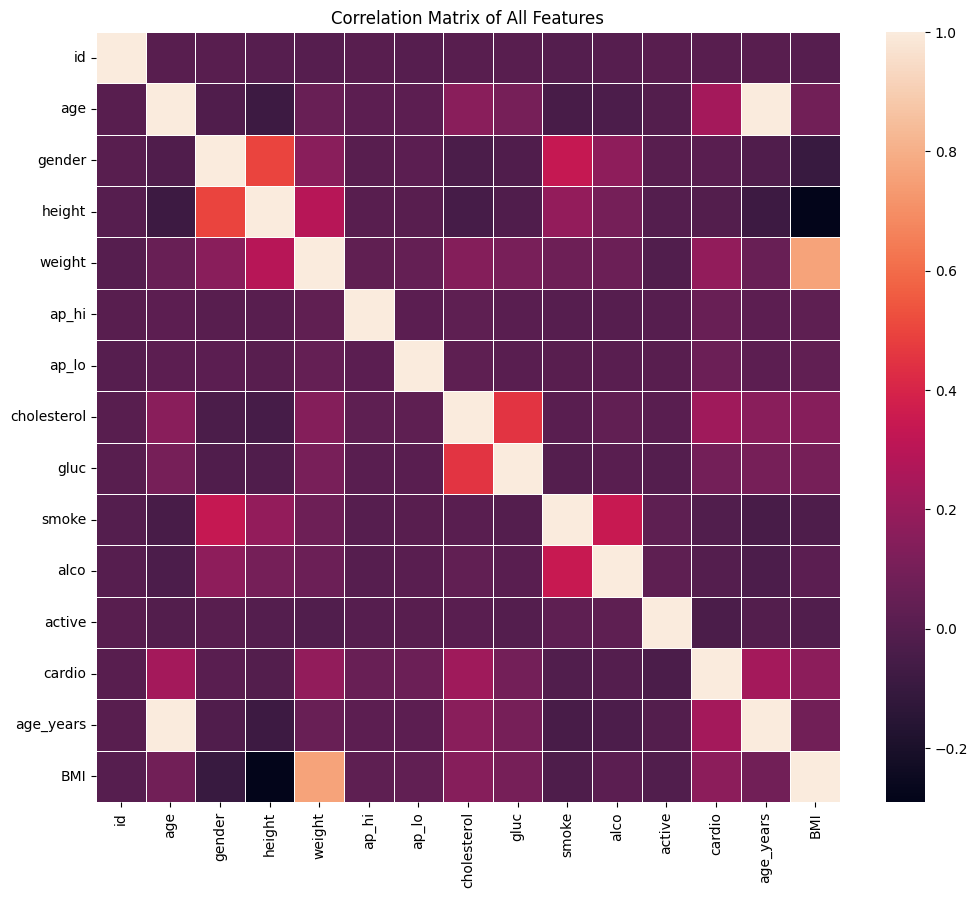

In [14]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr,  linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()

In [15]:
target_corr = corr['cardio'].sort_values(ascending=False)
print("Correlation with cardio:\n", target_corr)

Correlation with cardio:
 cardio         1.000000
age            0.238159
age_years      0.237985
cholesterol    0.221147
weight         0.181660
BMI            0.165632
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


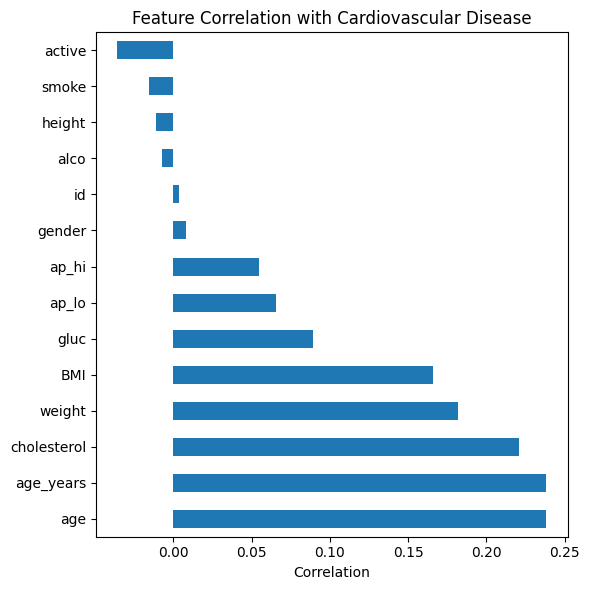

In [16]:
plt.figure(figsize=(6, 6))
target_corr.drop('cardio').plot(kind='barh')
plt.title("Feature Correlation with Cardiovascular Disease")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


## Age distribution analysis with 5-year bins and disease prevalence

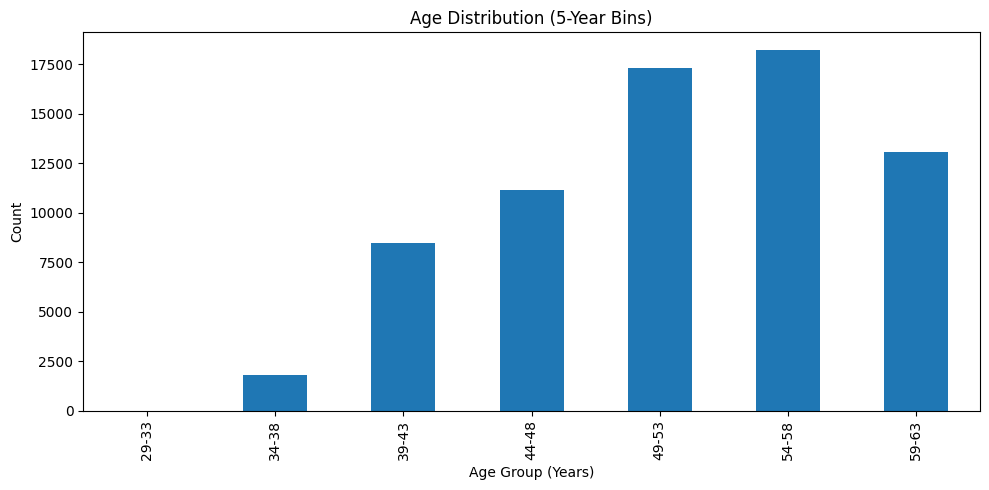

In [17]:

bins = list(range(df['age_years'].min(), df['age_years'].max() + 5, 5))
labels = [f"{b}-{b+4}" for b in bins[:-1]]

df['age_bin'] = pd.cut(df['age_years'], bins=bins, labels=labels, include_lowest=True)
age_dist = df['age_bin'].value_counts().sort_index()




plt.figure(figsize=(10, 5))
age_dist.plot(kind='bar')
plt.title("Age Distribution (5-Year Bins)")
plt.ylabel("Count")
plt.xlabel("Age Group (Years)")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_17456\330153795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prevalence = df.groupby('age_bin')['cardio'].mean()


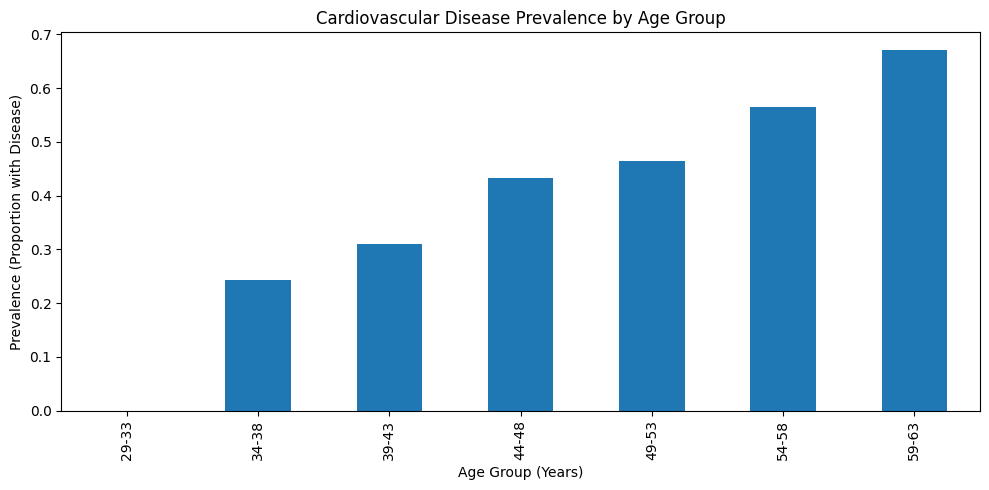

In [18]:

prevalence = df.groupby('age_bin')['cardio'].mean()
plt.figure(figsize=(10, 5))
prevalence.plot(kind='bar')
plt.title("Cardiovascular Disease Prevalence by Age Group")
plt.ylabel("Prevalence (Proportion with Disease)")
plt.xlabel("Age Group (Years)")
plt.tight_layout()
plt.show()


## Blood pressure category visualization (normal, stage 1, stage 2 hypertension)

In [19]:

def bp_category(row):
    sys = row['ap_hi']
    dia = row['ap_lo']

    if sys < 120 and dia < 80:
        return "Normal"
    elif (120 <= sys < 140) or (80 <= dia < 90):
        return "Stage 1"
    elif sys >= 140 or dia >= 90:
        return "Stage 2"
    else:
        return "Unknown"

df['bp_category'] = df.apply(bp_category, axis=1)



<Figure size 800x500 with 0 Axes>

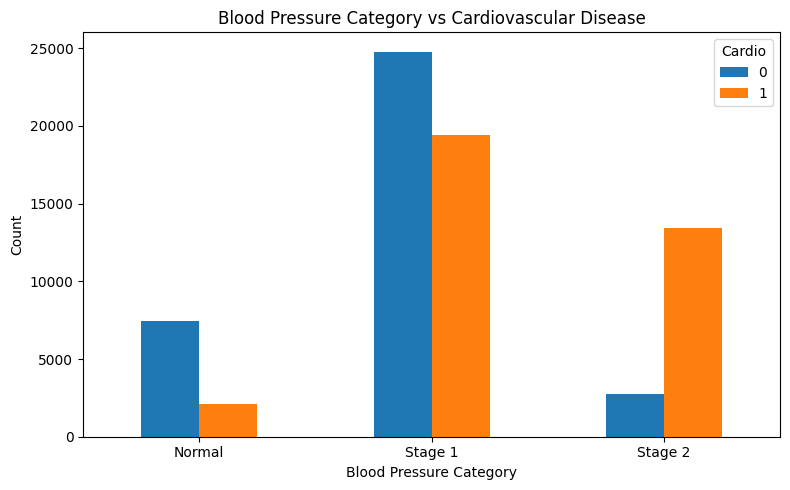

In [20]:

plt.figure(figsize=(8,5))
df.groupby(['bp_category', 'cardio']).size().unstack().plot(kind='bar', figsize=(8,5))
plt.title("Blood Pressure Category vs Cardiovascular Disease")
plt.xlabel("Blood Pressure Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()


## Interactive Plotly dashboards showing risk factor combinations

In [21]:
features = df.copy()
features["Age"] = (features["age"] / 365.25).clip(18, 90).round(1)
features["BMI"] = (features["weight"] / (features["height"] / 100) ** 2).clip(15, 60).round(1)
features["SmokingStatus"] = features["smoke"].map({0: "Non-smoker", 1: "Smoker"})
features["ActivityLevel"] = features["active"].map({0: "Low activity", 1: "Active"})
features["AlcoholUse"] = features["alco"].map({0: "No alcohol", 1: "Alcohol use"})
chol_map = {1: "Normal", 2: "Above normal", 3: "Well above"}
features["CholesterolLevel"] = features["cholesterol"].map(chol_map)
features["GlucoseLevel"] = features["gluc"].map({1: "Normal", 2: "Above normal", 3: "Well above"})
features["CardioDiagnosed"] = features["cardio"].map({0: "No diagnosis", 1: "Diagnosed"})
features["SystolicBP"] = features["ap_hi"].clip(80, 240)
features["DiastolicBP"] = features["ap_lo"].clip(40, 140)

minmax = lambda s: (s - s.min()) / (s.max() - s.min())
risk_score = (
    0.25 * minmax(features["Age"]) +
    0.20 * minmax(features["BMI"]) +
    0.20 * minmax(features["SystolicBP"]) +
    0.10 * minmax(features["DiastolicBP"]) +
    0.10 * minmax(features["cholesterol"].astype(float)) +
    0.05 * minmax(features["gluc"].astype(float)) +
    0.04 * features["smoke"] +
    0.03 * features["alco"] +
    0.03 * features["cardio"] -
    0.05 * features["active"]
)
risk_score = (risk_score - risk_score.min()) / (risk_score.max() - risk_score.min())

features["RiskScore"] = risk_score
features["RiskSegment"] = pd.qcut(
    risk_score.rank(method="first"),
    q=3,
    labels=["Low", "Moderate", "High"]
)

risk_df = features[
    [
        "Age",
        "BMI",
        "SmokingStatus",
        "ActivityLevel",
        "AlcoholUse",
        "CholesterolLevel",
        "GlucoseLevel",
        "CardioDiagnosed",
        "SystolicBP",
        "DiastolicBP",
        "RiskScore",
        "RiskSegment",
    ]
].copy()
risk_df["RiskScore"] = risk_df["RiskScore"].round(3)
plot_df = risk_df.sample(n=min(7000, len(risk_df)), random_state=42)

risk_df.head()


Age   BMI SmokingStatus ActivityLevel  AlcoholUse CholesterolLevel  \
0  50.4  22.0    Non-smoker        Active  No alcohol           Normal   
1  55.4  34.9    Non-smoker        Active  No alcohol       Well above   
2  51.6  23.5    Non-smoker  Low activity  No alcohol       Well above   
3  48.2  28.7    Non-smoker        Active  No alcohol           Normal   
4  47.8  23.0    Non-smoker  Low activity  No alcohol           Normal   

  GlucoseLevel CardioDiagnosed  SystolicBP  DiastolicBP  RiskScore RiskSegment  
0       Normal    No diagnosis         110           80      0.221         Low  
1       Normal       Diagnosed         140           90      0.601        High  
2       Normal       Diagnosed         130           70      0.516        High  
3       Normal       Diagnosed         150          100      0.382    Moderate  
4       Normal    No diagnosis         100           60      0.226         Low

In [22]:
combo_dims = ["SmokingStatus", "ActivityLevel", "RiskSegment"]
combo_summary = (
    risk_df
    .groupby(combo_dims, as_index=False, observed=True)
    .agg(
        Count=("RiskScore", "size"),
        MeanRisk=("RiskScore", "mean"),
        AvgAge=("Age", "mean"),
        AvgBMI=("BMI", "mean"),
        AvgSysBP=("SystolicBP", "mean")
    )
)
combo_summary.head()


SmokingStatus ActivityLevel RiskSegment  Count  MeanRisk     AvgAge  \
0    Non-smoker        Active         Low  19635  0.239192  48.122878   
1    Non-smoker        Active    Moderate  16997  0.381172  55.450179   
2    Non-smoker        Active        High  14467  0.547981  58.069068   
3    Non-smoker  Low activity         Low   2392  0.261504  44.931104   
4    Non-smoker  Low activity    Moderate   4328  0.387969  52.528743   

      AvgBMI    AvgSysBP  
0  25.187833  116.457194  
1  27.439978  126.966877  
2  30.855347  140.735882  
3  24.481605  113.880853  
4  26.253512  121.885860

### Age/BMI space with smoking-based animation


In [23]:
scatter_fig = px.scatter(
    plot_df,
    x="Age",
    y="BMI",
    color="RiskSegment",
    size="SystolicBP",
    animation_frame="SmokingStatus",
    facet_col="ActivityLevel",
    facet_col_wrap=2,
    hover_data=["CholesterolLevel", "GlucoseLevel", "CardioDiagnosed", "RiskScore"],
    size_max=20,
    color_discrete_map={"Low": "#7fc97f", "Moderate": "#fdc086", "High": "#d73027"},
    opacity=0.75,
    template="plotly_white",
    title="Age/BMI distribution by activity level, animated by smoking status"
)
scatter_fig.update_layout(
    margin=dict(l=40, r=20, t=70, b=40),
    legend_title="Risk segment",
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 900, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 55},
            "showactive": False,
            "type": "buttons",
            "x": 0.05,
            "xanchor": "right",
            "y": 1.2,
            "yanchor": "top"
        }
    ]
)
scatter_fig


### smoking/activity combinations by risk segment



In [24]:
segments = risk_df["RiskSegment"].cat.categories
activity_order = ["Low activity", "Active"]
smoking_order = ["Non-smoker", "Smoker"]
heatmap_fig = go.Figure()

for idx, seg in enumerate(segments):
    subset = combo_summary[combo_summary["RiskSegment"] == seg]
    pivot = (
        subset
        .pivot(index="ActivityLevel", columns="SmokingStatus", values="MeanRisk")
        .reindex(index=activity_order, columns=smoking_order)
    )
    heatmap_fig.add_trace(
        go.Heatmap(
            z=pivot.values,
            x=pivot.columns,
            y=pivot.index,
            colorscale="YlOrRd",
            zmin=combo_summary["MeanRisk"].min(),
            zmax=combo_summary["MeanRisk"].max(),
            colorbar=dict(title="Mean risk score"),
            text=pivot.round(3),
            hovertemplate="Smoking: %{x}<br>Activity: %{y}<br>Mean risk: %{z:.3f}<extra></extra>",
            visible=idx == 0,
            name=str(seg)
        )
    )

heatmap_fig.update_layout(
    title="Mean risk by smoking/activity combination",
    xaxis_title="Smoking status",
    yaxis_title="Activity level",
    template="plotly_white",
    updatemenus=[
        {
            "buttons": [
                {
                    "label": str(seg),
                    "method": "update",
                    "args": [{"visible": [i == j for i in range(len(segments))]}, {"title": f"Mean risk by smoking/activity — {seg} segment"}]
                }
                for j, seg in enumerate(segments)
            ],
            "direction": "down",
            "showactive": True,
            "x": 1.05,
            "xanchor": "left",
            "y": 0.9,
            "yanchor": "top"
        }
    ]
)
heatmap_fig


### Parallel categories for multi-factor flows



In [25]:
parcats_fig = px.parallel_categories(
    plot_df,
    dimensions=["SmokingStatus", "ActivityLevel", "CholesterolLevel", "GlucoseLevel", "RiskSegment"],
    color="RiskScore",
    color_continuous_scale=px.colors.sequential.Reds,
    labels={
        "SmokingStatus": "Smoking",
        "ActivityLevel": "Activity",
        "CholesterolLevel": "Cholesterol",
        "GlucoseLevel": "Glucose",
        "RiskSegment": "Segment"
    },
    title="Risk factor pathways colored by individualized risk score"
)
parcats_fig.update_traces(
    hovertemplate="%{dimensions[0].label}: %{dimensions[0].value}<br>"
    "%{dimensions[1].label}: %{dimensions[1].value}<br>"
    "%{dimensions[2].label}: %{dimensions[2].value}<br>"
    "%{dimensions[3].label}: %{dimensions[3].value}<br>"
    "%{dimensions[4].label}: %{dimensions[4].value}<br>"
    "Mean risk score: %{color:.3f}<extra></extra>"
)
parcats_fig


In [26]:
scatter_fig = px.scatter(
    plot_df,
    x="Age",
    y="BMI",
    color="RiskSegment",
    size="SystolicBP",
    animation_frame="SmokingStatus",
    facet_col="ActivityLevel",
    facet_col_wrap=2,
    hover_data=["CholesterolLevel", "GlucoseLevel", "CardioDiagnosed", "RiskScore"],
    size_max=20,
    color_discrete_map={"Low": "#7fc97f", "Moderate": "#fdc086", "High": "#d73027"},
    opacity=0.75,
    template="plotly_white",
    title="Age/BMI distribution by activity level, animated by smoking status"
)
scatter_fig.update_layout(
    margin=dict(l=40, r=20, t=70, b=40),
    legend_title="Risk segment",
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 900, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 55},
            "showactive": False,
            "type": "buttons",
            "x": 0.05,
            "xanchor": "right",
            "y": 1.2,
            "yanchor": "top"
        }
    ]
)
scatter_fig


## smoking/activity combinations by risk segment



In [27]:
segments = risk_df["RiskSegment"].cat.categories
activity_order = ["Low activity", "Active"]
smoking_order = ["Non-smoker", "Smoker"]
heatmap_fig = go.Figure()

for idx, seg in enumerate(segments):
    subset = combo_summary[combo_summary["RiskSegment"] == seg]
    pivot = (
        subset
        .pivot(index="ActivityLevel", columns="SmokingStatus", values="MeanRisk")
        .reindex(index=activity_order, columns=smoking_order)
    )
    heatmap_fig.add_trace(
        go.Heatmap(
            z=pivot.values,
            x=pivot.columns,
            y=pivot.index,
            colorscale="YlOrRd",
            zmin=combo_summary["MeanRisk"].min(),
            zmax=combo_summary["MeanRisk"].max(),
            colorbar=dict(title="Mean risk score"),
            text=pivot.round(3),
            hovertemplate="Smoking: %{x}<br>Activity: %{y}<br>Mean risk: %{z:.3f}<extra></extra>",
            visible=idx == 0,
            name=str(seg)
        )
    )

heatmap_fig.update_layout(
    title="Mean risk by smoking/activity combination",
    xaxis_title="Smoking status",
    yaxis_title="Activity level",
    template="plotly_white",
    updatemenus=[
        {
            "buttons": [
                {
                    "label": str(seg),
                    "method": "update",
                    "args": [{"visible": [i == j for i in range(len(segments))]}, {"title": f"Mean risk by smoking/activity — {seg} segment"}]
                }
                for j, seg in enumerate(segments)
            ],
            "direction": "down",
            "showactive": True,
            "x": 1.05,
            "xanchor": "left",
            "y": 0.9,
            "yanchor": "top"
        }
    ]
)
heatmap_fig


In [28]:
scatter_fig = px.scatter(
    plot_df,
    x="Age",
    y="BMI",
    color="RiskSegment",
    size="SystolicBP",
    animation_frame="SmokingStatus",
    facet_col="ActivityLevel",
    facet_col_wrap=2,
    hover_data=["CholesterolLevel", "GlucoseLevel", "CardioDiagnosed", "RiskScore"],
    size_max=20,
    color_discrete_map={"Low": "#7fc97f", "Moderate": "#fdc086", "High": "#d73027"},
    opacity=0.75,
    template="plotly_white",
    title="Age/BMI distribution by activity level, animated by smoking status"
)
scatter_fig.update_layout(
    margin=dict(l=40, r=20, t=70, b=40),
    legend_title="Risk segment",
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 900, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 55},
            "showactive": False,
            "type": "buttons",
            "x": 0.05,
            "xanchor": "right",
            "y": 1.2,
            "yanchor": "top"
        }
    ]
)
scatter_fig


## Statistical significance testing using chi-square and t-tests across demographic groups


In [31]:
def chi_square_test(df: pd.DataFrame, feature: str, target: str = "cardio") -> dict:
    """Run a chi-square independence test between a categorical feature and the target."""
    contingency = pd.crosstab(df[feature], df[target])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
    return {
        "feature": feature,
        "chi2": chi2,
        "dof": dof,
        "p_value": p_value,
        "contingency": contingency,
        "expected": expected,
    }

In [32]:
def t_test_by_group(
    df: pd.DataFrame,
    metric: str,
    group_col: str = "gender_label",
    baseline: str = "female",
    comparison: str = "male",
) -> dict:
    """Welch's t-test comparing a metric between two demographic groups."""
    group_a = df.loc[df[group_col] == baseline, metric].dropna()
    group_b = df.loc[df[group_col] == comparison, metric].dropna()
    t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)
    return {
        "metric": metric,
        "group_col": group_col,
        "groups": (baseline, comparison),
        "t_stat": t_stat,
        "p_value": p_value,
        "mean_a": group_a.mean(),
        "mean_b": group_b.mean(),
    }


In [37]:
df["gender_label"] = df["gender"].map({1: "female", 2: "male"})
age_bins = [0, 40, 50, 60, 70, 150]
age_labels = ["<40", "40-49", "50-59", "60-69", "70+"]
df["age_group"] = pd.cut(df["age_years"], bins=age_bins, labels=age_labels, right=False)


In [38]:

categorical_features = ["gender_label", "cholesterol", "gluc", "smoke", "alco", "active", "age_group"]
chi_square_results = [chi_square_test(df.dropna(subset=[feature]), feature) for feature in categorical_features]

continuous_metrics = ["age_years", "height", "weight", "BMI", "ap_hi", "ap_lo"]
t_test_results = [t_test_by_group(df, metric) for metric in continuous_metrics]

print("\nCHI-SQUARE TESTS AGAINST cardio")
for res in chi_square_results:
    print(f"{res['feature']:>12} | chi2={res['chi2']:.2f} | dof={res['dof']:>2} | p={res['p_value']:.3e}")

print("\nT-TESTS (male vs female)")
for res in t_test_results:
    g_a, g_b = res["groups"]
    print(
        f"{res['metric']:>8} | t={res['t_stat']:.2f} | p={res['p_value']:.3e} | "
        f"{g_a} mean={res['mean_a']:.2f} | {g_b} mean={res['mean_b']:.2f}"
    )


CHI-SQUARE TESTS AGAINST cardio
gender_label | chi2=4.57 | dof= 1 | p=3.255e-02
 cholesterol | chi2=3423.44 | dof= 2 | p=0.000e+00
        gluc | chi2=586.91 | dof= 2 | p=3.579e-128
       smoke | chi2=16.68 | dof= 1 | p=4.429e-05
        alco | chi2=3.70 | dof= 1 | p=5.453e-02
      active | chi2=88.80 | dof= 1 | p=4.365e-21
   age_group | chi2=3161.66 | dof= 3 | p=0.000e+00

T-TESTS (male vs female)
age_years | t=5.99 | p=2.081e-09 | female mean=52.95 | male mean=52.63
  height | t=-151.23 | p=0.000e+00 | female mean=161.36 | male mean=169.95
  weight | t=-41.67 | p=0.000e+00 | female mean=72.57 | male mean=77.26
     BMI | t=27.46 | p=4.866e-165 | female mean=27.99 | male mean=26.75
   ap_hi | t=-1.63 | p=1.038e-01 | female mean=128.14 | male mean=130.08
   ap_lo | t=-3.81 | p=1.374e-04 | female mean=94.52 | male mean=100.55


### chi-square and t-tests across demographic groups (visualization)

In [42]:

chi_df = pd.DataFrame(chi_square_results)
chi_df = chi_df.sort_values("chi2", ascending=False)
chi_df["-log10(p)"] = -np.log10(chi_df["p_value"])

t_df = pd.DataFrame(t_test_results)
t_df["-log10(p)"] = -np.log10(t_df["p_value"])


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10



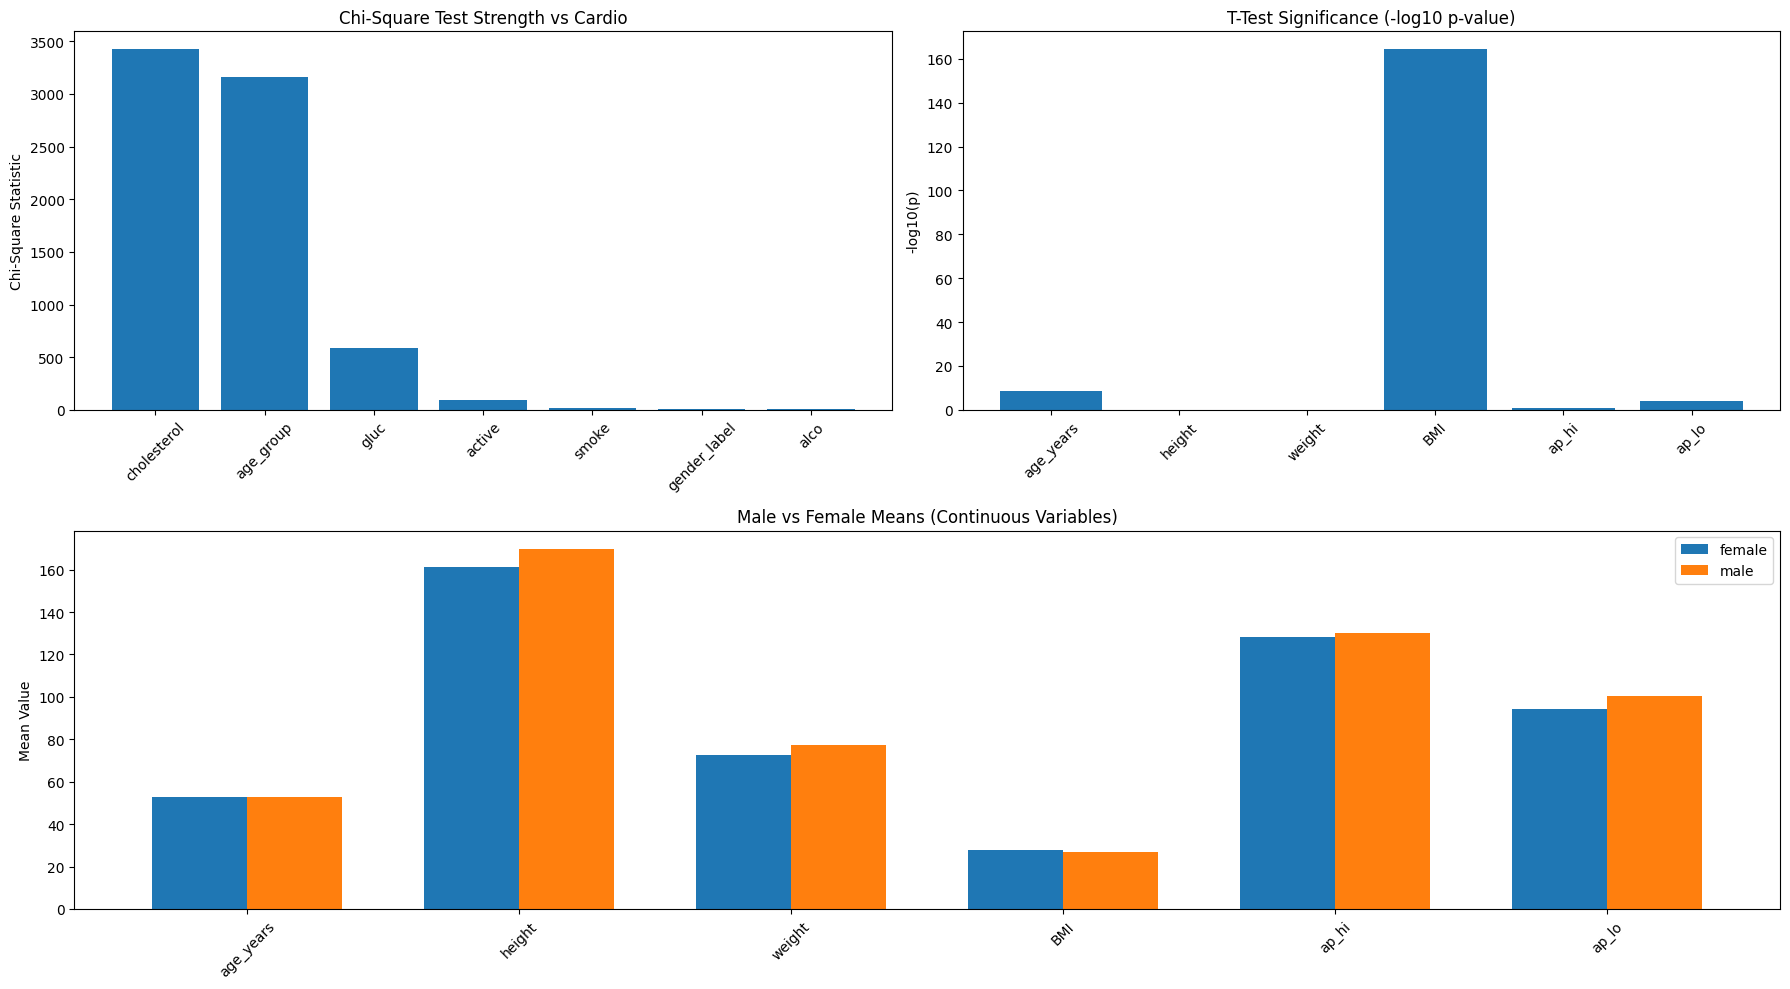

In [ ]:

fig = plt.figure(figsize=(18, 10))

ax1 = fig.add_subplot(2, 2, 1)

ax1.bar(chi_df["feature"], chi_df["chi2"])
ax1.set_title("Chi-Square Test Strength vs Cardio")
ax1.set_ylabel("Chi-Square Statistic")
ax1.tick_params(axis='x', rotation=45)


ax2 = fig.add_subplot(2, 2, 2)

ax2.bar(t_df["metric"], t_df["-log10(p)"])
ax2.set_title("T-Test Significance (-log10 p-value)")
ax2.set_ylabel("-log10(p)")
ax2.tick_params(axis='x', rotation=45)


ax3 = fig.add_subplot(2, 1, 2)

indices = np.arange(len(t_df))
width = 0.35

ax3.bar(indices - width/2, t_df["mean_a"], width, label=t_df["groups"][0][0])  
ax3.bar(indices + width/2, t_df["mean_b"], width, label=t_df["groups"][0][1])  

ax3.set_title("Male vs Female Means (Continuous Variables)")
ax3.set_xticks(indices)
ax3.set_xticklabels(t_df["metric"], rotation=45)
ax3.set_ylabel("Mean Value")
ax3.legend()

plt.tight_layout()
plt.show()
